In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.pyplot import MultipleLocator
from dla_cnn.desi.load_fits_files import load_DesiMocks,sightline_retriever
#from dla_cnn.desi.uniform_snr import split_bins
from dla_cnn.desi.uniform_zdla_nhi import uniform_z_nhi

In [10]:
samplesnr_id=np.load('/Users/zjq/samplesnr_id.npy',allow_pickle=True)

In [3]:
files = [700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 791, 792, 793, 794, 795, 796, 797, 798, 799]
path = '/Users/zjq/7'
Mocks = load_DesiMocks(files,path)

## Uniform z,NHI

In [5]:
nhisample,zsample,sampleid,sample_dla_id=uniform_z_nhi(samplesnr_id,5,8,25,Mocks)

# Analyze uniform sample

Text(0.5, 1.0, 'HIST of DLA NHI Sample')

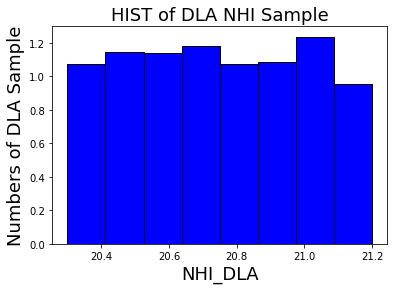

In [7]:
#draw histogram of NHI
plt.hist(np.array(nhisample).ravel(),bins=8,color='blue',edgecolor='black',density=True)
plt.xlabel('NHI_DLA',fontsize=18)
plt.ylabel('Numbers of DLA Sample',fontsize=18)
plt.title('HIST of DLA NHI Sample',fontsize=18)
#plt.savefig('Desktop/HISTofDLA NHI Sample.png')


Text(0.5, 1.0, 'HIST of DLA Z Sample')

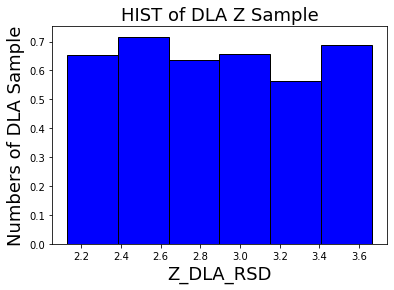

In [8]:
#draw histogram of Z with RSD
plt.hist(np.array(zsample).ravel(),bins=6,color='blue',edgecolor='black',density=True)
plt.xlabel('Z_DLA_RSD',fontsize=18)
plt.ylabel('Numbers of DLA Sample',fontsize=18)
plt.title('HIST of DLA Z Sample',fontsize=18)
#plt.savefig('Desktop/hist of DLA Z Sample.png')



In [9]:
#ks test uniform distribution 
from scipy import stats
dist1=stats.uniform(20.3,0.9)
yy=dist1.rvs(1000)
dist2=stats.uniform(np.amin(zsample),np.ptp(zsample))
xx=dist2.rvs(1000)
print(stats.ks_2samp(np.array(nhisample).ravel(),yy),stats.ks_2samp(np.array(zsample).ravel(),xx))

Ks_2sampResult(statistic=0.03, pvalue=0.7593695685682871) Ks_2sampResult(statistic=0.049, pvalue=0.18116454248303263)


In [65]:
save_file='/Users/zjq/uniformsample_id.npy'
np.save(save_file, sampleid)

In [66]:
sample_id=np.load(save_file,allow_pickle=True)